In [5]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from torch.distributions.multivariate_normal import MultivariateNormal

import torch.nn as nn


np.random.seed(33)

# Size

n = 40
d = 200

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 1, 1, 2, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0,
       0, 0])

In [3]:
h2g=0.2
pis=(0.9, 0.1)
gammas=(0., 1.)
binomial_threshold=0.
assign = np.zeros(len(pis), dtype=np.int)
assign[1] = 1

mixture_assignment = {}
betas = {}
std_beta = 1.


for i in range(5):
    mixture_assignment[i] = np.repeat(np.array([assign]), 2, axis=0)    
    betas[i] = np.random.normal(loc=0.0,
                         scale=gammas[1]*std_beta,
                         size=17489)
    
mixture_assignment
print(betas)




{0: array([-0.31885351, -1.60298056, -1.53521787, ...,  0.34811542,
       -1.37711603,  0.11296759]), 1: array([ 0.4664882 , -0.19149423,  0.46830035, ...,  0.91957303,
       -0.26146959,  0.39389204]), 2: array([ 0.71608589, -1.07193537,  0.05738954, ..., -0.98199991,
       -1.76109855,  0.77373656]), 3: array([-0.35958667,  0.78089144, -0.09357418, ..., -1.25550093,
        0.61137276, -1.73775409]), 4: array([ 1.6052183 , -1.02121646, -0.70916259, ...,  0.44209801,
       -1.51275554,  2.25410707])}


In [41]:
m = np.array([1 for _ in range(d)])
K_0 = np.array([[1 for _ in range(d)] for _ in range(d)])
np.fill_diagonal(K_0, 2)

epsilon = 0.01

K = K_0 + epsilon * np.identity(d)

K += np.clip(np.random.randn(d, d), -1, 1)
K

array([[1.69114649, 0.        , 0.        , ..., 0.        , 1.43914602,
        1.99846703],
       [1.43774739, 1.98278347, 0.        , ..., 1.66416495, 2.        ,
        1.26206075],
       [1.31320597, 2.        , 2.75860378, ..., 1.05898467, 1.28972556,
        0.73229357],
       ...,
       [1.97891026, 0.31373144, 0.        , ..., 1.93348038, 0.92858445,
        1.12875453],
       [2.        , 0.        , 0.        , ..., 2.        , 1.82610059,
        2.        ],
       [0.37396368, 0.58414248, 2.        , ..., 1.22988153, 0.09844101,
        1.88801355]])

In [6]:
toy_data = np.random.multivariate_normal(mean=m.reshape(d,), cov=K, size=n)
y = np.transpose(toy_data)

/Library/Python/3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: covariance is not positive-semidefinite.
  """Entry point for launching an IPython kernel.


In [7]:
pca = decomposition.PCA(n_components=2)
x_std = StandardScaler().fit_transform(toy_data)
component = pca.fit_transform(x_std)
component.shape

(40, 2)

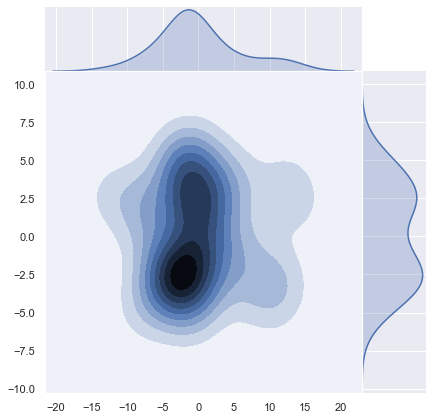

In [8]:
sns.jointplot(x=component[:, 0], y=component[:, 1], kind="kde", space=0)

(array([1.000e+01, 1.010e+02, 5.250e+02, 1.588e+03, 2.439e+03, 2.117e+03,
        9.340e+02, 2.520e+02, 3.200e+01, 2.000e+00]),
 array([-11.03763641,  -8.48936692,  -5.94109742,  -3.39282793,
         -0.84455844,   1.70371106,   4.25198055,   6.80025005,
          9.34851954,  11.89678903,  14.44505853]),
 <a list of 10 Patch objects>)

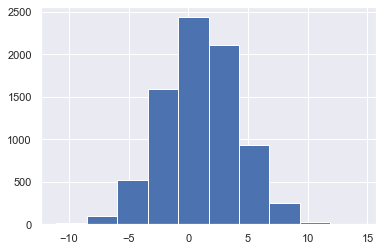

In [9]:
plt.hist(toy_data.flatten())

In [10]:
toy_data[(toy_data >= 0) & (toy_data <= 2)] = 0
toy_data[toy_data < 0] = 1
toy_data[toy_data > 2] = 2


In [11]:
toy_data

array([[0., 0., 1., ..., 0., 1., 1.],
       [1., 1., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 0., 0., 2.],
       ...,
       [0., 1., 1., ..., 0., 1., 2.],
       [0., 2., 0., ..., 2., 2., 2.],
       [0., 1., 1., ..., 2., 2., 2.]])

In [32]:
phenotypes = np.zeros(n)

# Causal SNPs
causal_snps = np.random.randint(0, d, 20)
causal_snps_alterrnative = np.random.randint(0, d, 20)
causal_snps_alterrnative2 = np.random.randint(0, d, 20)


## TODO
    # Using the Gaussian distribtuin with the variance differs

In [33]:
def generating_phenotype(index):
    causal_row = toy_data[index, causal_snps]
    causal_row_alt = toy_data[index, causal_snps_alterrnative]
    causal_row_alt2 = toy_data[index, causal_snps_alterrnative2]



    phen = 100 * (causal_row[np.random.randint(len(causal_row))] / np.sum(np.exp(causal_row ** 2))) +\
            10 * (causal_row_alt[np.random.randint(len(causal_row_alt))] / np.sum(np.exp(causal_row_alt ** 2))) +\
            1 * (causal_row_alt2[np.random.randint(len(causal_row_alt2))] / np.sum(np.exp(causal_row_alt2 ** 2)))

    
    phenotypes[index] = (phen >= 0.5).astype(int)

In [34]:
vec_func = np.vectorize(generating_phenotype)
vec_func(np.arange(n))

print(phenotypes)
print(toy_data)

[0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 1. ... 0. 1. 1.]
 [1. 1. 0. ... 1. 0. 1.]
 [0. 0. 1. ... 0. 0. 2.]
 ...
 [0. 1. 1. ... 0. 1. 2.]
 [0. 2. 0. ... 2. 2. 2.]
 [0. 1. 1. ... 2. 2. 2.]]


In [35]:
n_m = 80

m = np.array([1 for _ in range(d)])
K_0 = np.array([[1 for _ in range(d)] for _ in range(d)])
np.fill_diagonal(K_0, 2)

epsilon = 0.01

K = K_0 + epsilon * np.identity(d)

K += np.clip(np.random.randn(d, d), 0, 1)
K

x_m = np.random.multivariate_normal(mean=m.reshape(d,), cov=K, size=n_m)
x_m[(x_m >= 0) & (x_m <= 2)] = 0
x_m[x_m < 0] = 1
x_m[x_m > 2] = 2

x_m.shape


## TODO

/Library/Python/3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: covariance is not positive-semidefinite.
  


(80, 200)

In [36]:
# Priors




params = 100

from scipy.stats import invgamma, norm


def sampling_from_theta(batch_size):
    
    def one_sample():

        sigma_square = invgamma.rvs(np.mean(toy_data), size=params)
        mu = np.random.normal(np.mean(toy_data), params, size=params)

        uniform_dist = np.random.uniform(np.log(1), np.log(n), params)

        # plt.hist(sigma_square)
        # plt.show()
        # plt.hist(uniform_dist)
        # plt.show()

        weights = np.exp(uniform_dist)
        pi_dist = y = np.fromiter((norm.rvs(mu[i], sigma_square[i]) for i in range(params)), dtype=np.float64)

        xs = np.linspace(y.min(), y.max(), params)
        ys = np.zeros_like(xs)

        for i in range(params):
            ys += norm.pdf(xs, loc=mu[i], scale=sigma_square[i]) * weights[i]

        return np.array(ys)
    
    samples = one_sample()[None,:]
    
    if batch_size > 1:
        samples = np.concatenate([samples, one_sample()[None,:]], axis=0)
    
    return samples
        
# plt.plot(xs, ys)
# plt.xlabel("x")
# plt.ylabel("f(x)")
# plt.show()

In [37]:
class Generator(nn.Module):
    
    def __init__(self):
        super(Generator, self).__init__()
        
        self.stream_t = nn.Sequential(nn.Conv1d(in_channels=100, out_channels=64, kernel_size=1, stride=2), 
                                      nn.ReLU(),
                                      nn.Conv1d(in_channels=64, out_channels=128, kernel_size=1),
                                      nn.ReLU(),
                                      nn.Conv1d(in_channels=128, out_channels=d, kernel_size=1))
        
        
        ## TODO 
            # Linear genarator
        
        self.softmax = nn.LogSoftmax(dim=0)

    def forward(self, thetas):
        out = self.stream_t(thetas)
        return self.softmax(out)

In [94]:
class H_function(nn.Module):
    
    def __init__(self, hidden_size, output_size):
        super(H_function, self).__init__()
        self.hidden_size  = hidden_size
        self.fc1 = nn.Linear(d, self.hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(self.hidden_size, output_size)
        self.sigmoid = nn.ReLU()
    def forward(self, x):
        hidden = self.fc1(x)
        relu = self.relu(hidden)
        output = self.fc2(relu)
        output = self.sigmoid(output) 
        
        # We may need a auxilary loss here!
        
        return output

In [153]:
class LogisticRegression(nn.Module):
    
    def __init__(self, input_dim, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, num_classes)
        self.activation = nn.ReLU()
        self.criterion = self.cross_entropy

        
    def cross_entropy(self, x, y):
        n_d, h_d = x.shape
        
        n_theta = x[0: int(n_d / 2),:]
        n_x = x[int(n_d / 2):,:]
        
        return (1 / n_d) * (torch.sum(torch.exp(-(n_theta))) + torch.sum(torch.exp(n_x)))
        
    def forward(self, x, y=None):
        out = self.linear(x)
        out = self.activation(out)
        
        if y is not None:
            loss = self.criterion(out, y)
            return out, loss
        
        return out

In [154]:
# Traininng The Classifier!

#TODO

In [158]:
EPOCHS = 1
BATCH_SIZE = 2


posterior_pdf = {}

pdf_moodel = Generator()
h = H_function(64, 32)
classifier = LogisticRegression(32, 2)

for _ in range(100):

    thetas = torch.Tensor(sampling_from_theta(BATCH_SIZE)[:, :, None])   
    out = torch.exp(pdf_moodel(thetas))
    out[(out >= 0) & (out <= 0.4)] = 0
    out[(out > 0.4) & (out <= 0.64)] = 1
    out[(out > 0.65) & (out < 1)] = 2

    for _ in range(EPOCHS):

        h_value = h(torch.squeeze(out, -1))

        out, loss = classifier(h_value, True)
        
        loss.backward()

    posterior_pdf.put(thetas: h_value.params)
